# Milestone 2

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Task 1
### 1) Importing raw Data

In [2]:
df = pd.read_csv('G:\\COSC301\\project\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv', index_col=0)
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,82,3,8,5,57,12,12,12,12,11,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### 2) Clean raw Data
#### Convert Type, Assign NaN, Remove Rows and Reset

In [3]:
# Deletes the incorrectly formatted Column Name Header Row
df.drop(index=df.index[0], axis=0, inplace=True)

# This Data consisted of data stored as character strings although the data was represented as numerical

# This method first converts the strings to a more workable numeric format
df = df.astype(dtype='int64',errors='ignore')

# Second, all empty cells are filled with NaN
df.replace("",float("NaN"),inplace=True)

# Third, any rows containing NaN values are removed
df.dropna(inplace = True)

# Fourth, Reset the index since removing rows can cause it to get upset.
df.reset_index(drop=True)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### 3) Process Data
#### Time to rename some columns!

In [4]:
df = df.rename(columns={"X1":"Credit Limit",
                        "X2":"Sex",
                        "X3":"Education",
                        "X4":"Marital Status",
                        "X5":"Age",
                        "X6":"Pay/Sept07",
                        "X6":"PayStat/Sept05",
                        "X7":"PayStat/Aug05",
                        "X8":"PayStat/Jul05",
                        "X9":"PayStat/Jun05",
                        "X10":"PayStat/May05",
                        "X11":"PayStat/Apr05",
                        "X12":"Outstanding/Sept05",
                        "X13":"Outstanding/Aug05",
                        "X14":"Outstanding/Jul05",
                        "X15":"Outstanding/Jun05",
                        "X16":"Outstanding/May05",
                        "X17":"Outstanding/Apr05",
                        "X18":"Paid/Sept05",
                        "X19":"Paid/Aug05",
                        "X20":"Paid/Jul05",
                        "X21":"Paid/Jun05",
                        "X22":"Paid/May05",
                        "X23":"Paid/Apr05",
                        "Y":"Default"
                       }
              )
df

,Credit Limit,Sex,Education,Marital Status,Age,PayStat/Sept05,PayStat/Aug05,PayStat/Jul05,PayStat/Jun05,PayStat/May05,...,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


**Credit Limit:** The dollar value limit for the account

**Sex:** Gender of cardholder
         1 = Male
         2 = Female

**Education:** The Education level of Cardholder
         1 = Masters degree or Ph.D
         2 = Bachelors Degree
         3 = High School Diploma
         4 = Other

**Marital Status:** The Marital Status of the Cardholder.
         1 = Married
         2 = Single
         3 = Other
        
**Age:** Cardholders Age

**Pay Stat/(Month):** Delays in payment on the account for the month
        -1 = paid off in full on time
         0 = Bill paid on time
         1 = Bill paid 1 months late
         2 = Bill paid 2 months late
         3 = Bill paid 3 months late
         4 = Bill paid 4 months late
         5 = Bill paid 5 months late
         6 = Bill paid 6 months late
         7 = Bill paid 7 months late
         8 = Bill paid 8 months late
         9 = Bill paid 9+ months late
        
**Outstanding/(Month):**  Balance owed for the month

**Paid/(Month):** Balance Paid for the month

**Default:** True or False for default on account
         1 = Account defaulted
         0 = Account has not defaulted

#### Make it Readable
This is still a bit tricky to work with, so we will change the numeric legend into a string so we can actually see what we're talking about.

In [5]:
# Change gender to M/F instead of 1/2
df["Sex"] = df["Sex"].replace(1,"M")
df["Sex"] = df["Sex"].replace(2,"F")

# Change education level
df["Education"]=df["Education"].replace(1,"MSc or Ph.D")
df["Education"]=df["Education"].replace(2,"BSc")
df["Education"]=df["Education"].replace(3,"High School Diploma")
df["Education"]=df["Education"].replace(4,"Other")

# Change Marital Status
df["Marital Status"]= df["Marital Status"].replace(1,"Married")
df["Marital Status"]= df["Marital Status"].replace(2,"Single")
df["Marital Status"]= df["Marital Status"].replace(3,"Other")

# Change defaults to T/F
df["Default"]=df["Default"].replace(1,True)
df["Default"]=df["Default"].replace(0,False)
df.head()

,Credit Limit,Sex,Education,Marital Status,Age,PayStat/Sept05,PayStat/Aug05,PayStat/Jul05,PayStat/Jun05,PayStat/May05,...,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default
1,20000,F,BSc,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,True
2,120000,F,BSc,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,True
3,90000,F,BSc,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
4,50000,F,BSc,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
5,50000,M,BSc,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,False


### Create any needed aggregate/combinations of data
#### Dollar values of paid and outstanding balances by month

In [6]:
# We create 2 columns per month, one is the outstanding balance, the other is the amount paid for a chosen period (April to September 2005)

df["PayStat/Apr05"] = df["PayStat/Apr05"].apply(lambda x: x + 1)
df["PayStat/May05"] = df["PayStat/May05"].apply(lambda x: x + 1)
df["PayStat/Jun05"] = df["PayStat/Jun05"].apply(lambda x: x + 1)
df["PayStat/Jul05"] = df["PayStat/Jul05"].apply(lambda x: x + 1)
df["PayStat/Aug05"] = df["PayStat/Aug05"].apply(lambda x: x + 1)
df["PayStat/Sept05"] = df["PayStat/Sept05"].apply(lambda x: x + 1)

df.head()


,Credit Limit,Sex,Education,Marital Status,Age,PayStat/Sept05,PayStat/Aug05,PayStat/Jul05,PayStat/Jun05,PayStat/May05,...,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default
1,20000,F,BSc,Married,24,3,3,0,0,-1,...,0,0,0,0,689,0,0,0,0,True
2,120000,F,BSc,Single,26,0,3,1,1,1,...,3272,3455,3261,0,1000,1000,1000,0,2000,True
3,90000,F,BSc,Single,34,1,1,1,1,1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
4,50000,F,BSc,Married,37,1,1,1,1,1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
5,50000,M,BSc,Married,57,0,1,0,1,1,...,20940,19146,19131,2000,36681,10000,9000,689,679,False


#### Use those columns to produce a payment score value

In [7]:
# Create a payment score, by adding all payment stat data and then dividing by 6. Then remove the payment stat columns as we no longer need them.
df['Payment Score'] = (df["PayStat/Jun05"]+df["PayStat/Sept05"]+df["PayStat/Aug05"]+df["PayStat/Jul05"]+df["PayStat/May05"]+df["PayStat/Apr05"])/6                                                                                                     
df = df.drop(["PayStat/Jun05","PayStat/Sept05","PayStat/Aug05","PayStat/Jul05","PayStat/May05","PayStat/Apr05"], axis=1)
df.head()

,Credit Limit,Sex,Education,Marital Status,Age,Outstanding/Sept05,Outstanding/Aug05,Outstanding/Jul05,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default,Payment Score
1,20000,F,BSc,Married,24,3913,3102,689,0,0,0,0,689,0,0,0,0,True,0.666667
2,120000,F,BSc,Single,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,True,1.500000
3,90000,F,BSc,Single,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,False,1.000000
4,50000,F,BSc,Married,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,False,1.000000
5,50000,M,BSc,Married,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,False,0.666667


In [8]:
# Commented as it slows everything down. Used to visualize before task 3
# from pandas_profiling import ProfileReport

# ProfileReport(df).to_file(output_file="output.html")

## Task 2
### 1) Method Chaining

In [9]:
df1 = (
    pd.read_csv('G:\\COSC301\\project\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv', index_col=0)
)
# Convert, Rename, NaN, and Remove
df1=(
    df1
    .drop(index=df1.index[0])
    .astype(dtype='int64',errors='ignore')
    .rename(columns={
        "X1":"Credit Limit",
        "X2":"Sex",
        "X3":"Education",
        "X4":"Marital Status",
        "X5":"Age",
        "X6":"Pay/Sept07",
        "X6":"PayStat/Sept05",
        "X7":"PayStat/Aug05",
        "X8":"PayStat/Jul05",
        "X9":"PayStat/Jun05",
        "X10":"PayStat/May05",
        "X11":"PayStat/Apr05",
        "X12":"Outstanding/Sept05",
        "X13":"Outstanding/Aug05",
        "X14":"Outstanding/Jul05",
        "X15":"Outstanding/Jun05",
        "X16":"Outstanding/May05",
        "X17":"Outstanding/Apr05",
        "X18":"Paid/Sept05",
        "X19":"Paid/Aug05",
        "X20":"Paid/Jul05",
        "X21":"Paid/Jun05",
        "X22":"Paid/May05",
        "X23":"Paid/Apr05",
        "Y":"Default"
    }
           )
    .replace("",float("NaN"))
    .dropna(axis = 1)
    .replace({'Sex': {1: "M", 2: 'F'}})
    .replace({'Education': {1: "MSc or PHd", 2: 'BSc', 3: 'High School Diploma', 4:"Other", 5:"INV", 6:"INV", 0:"INV"}})
    .replace({'Marital Status': {1: "Married", 2: 'Single', 3: 'Other', 0:"INV"}})
    .replace({'Default': {1: "True", 0: 'False'}})
    .loc[lambda row : ~row['Education'].str.contains("INV")]
    .loc[lambda row : ~row['Marital Status'].str.contains("INV")]
)
# Create Paystats, outstanding, paid, and then create payment score.
df1=(
    df1
    .assign(Payment_Score=(
        ((1+df1[['PayStat/Sept05',
                 "PayStat/Aug05",
                 "PayStat/Jul05",
                 "PayStat/Jun05",
                 "PayStat/May05",
                 "PayStat/Apr05"]]
         )
                .astype(dtype='int64',errors='ignore')))
                .sum(axis=1)/6)    
    .assign(Avg_Outstanding=(
        ((df1[["Outstanding/Sept05",
               "Outstanding/Aug05",
               "Outstanding/Jul05",
               "Outstanding/Jun05",
               "Outstanding/May05",
               "Outstanding/Apr05"]]
         )
             .astype(dtype='int64',errors='ignore')))
            .sum(axis=1)/6)
    .assign(Avg_Paid=(
        ((df1[["Paid/Sept05",
               "Paid/Aug05",
               "Paid/Jul05",
               "Paid/Jun05",
               "Paid/May05",
               "Paid/Apr05"]]
         )
         .astype(dtype='int64',errors='ignore')))
            .sum(axis=1)/6)
    .drop(['PayStat/Sept05',
           "PayStat/Aug05",
           "PayStat/Jul05",
           "PayStat/Jun05",
           "PayStat/May05",
           "PayStat/Apr05",
           "Outstanding/Sept05",
           "Outstanding/Aug05",
           "Outstanding/Jul05",
           "Outstanding/Jun05",
           "Outstanding/May05",
           "Outstanding/Apr05",
           "Paid/Sept05",
           "Paid/Aug05",
           "Paid/Jul05",
           "Paid/Jun05",
           "Paid/May05",
           "Paid/Apr05"
          ]
          , axis = 1
         )
    .reindex(columns=[
        'Sex',
        'Education',
        'Marital Status',
        'Age',
        'Credit Limit'
        ,'Payment_Score',
        'Avg_Outstanding',
        'Avg_Paid',
        'Default'
    ]
            )
    .rename(columns = 
            {'Payment_Score':'Payment Score','Avg_Outstanding' : 'Avg Outstanding','Avg_Paid':'Avg Paid'}
           )
    .reset_index(drop=True)
)

In [10]:
df1.head()

,Sex,Education,Marital Status,Age,Credit Limit,Payment Score,Avg Outstanding,Avg Paid,Default
0,F,BSc,Married,24,20000,0.666667,1284.000000,114.833333,True
1,F,BSc,Single,26,120000,1.500000,2846.166667,833.333333,True
2,F,BSc,Single,34,90000,1.000000,16942.166667,1836.333333,False
3,F,BSc,Married,37,50000,1.000000,38555.666667,1398.000000,False
4,M,BSc,Married,57,50000,0.666667,18223.166667,9841.500000,False


### 3) Create Function
Function located in scripts folder

## Task 3 EDA
### Set themes and import data

In [11]:
from scripts import FunctionScript

#Set the theme and styling for future graphs
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'colorblind', font = 'Tahoma', font_scale = 1.5)

#Use function created in Task 2 and create a fresh dataset.
df = FunctionScript.LoadnClean('G:\\COSC301\\project\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv')
df.head()

,Sex,Education,Marital Status,Age,Credit Limit,Payment Score,Avg Outstanding,Avg Paid,Default
0,F,BSc,Married,24,20000,0.666667,1284.000000,114.833333,True
1,F,BSc,Single,26,120000,1.500000,2846.166667,833.333333,True
2,F,BSc,Single,34,90000,1.000000,16942.166667,1836.333333,False
3,F,BSc,Married,37,50000,1.000000,38555.666667,1398.000000,False
4,M,BSc,Married,57,50000,0.666667,18223.166667,9841.500000,False


### Data Visualization
#### 1) Pairplot to visualize data set

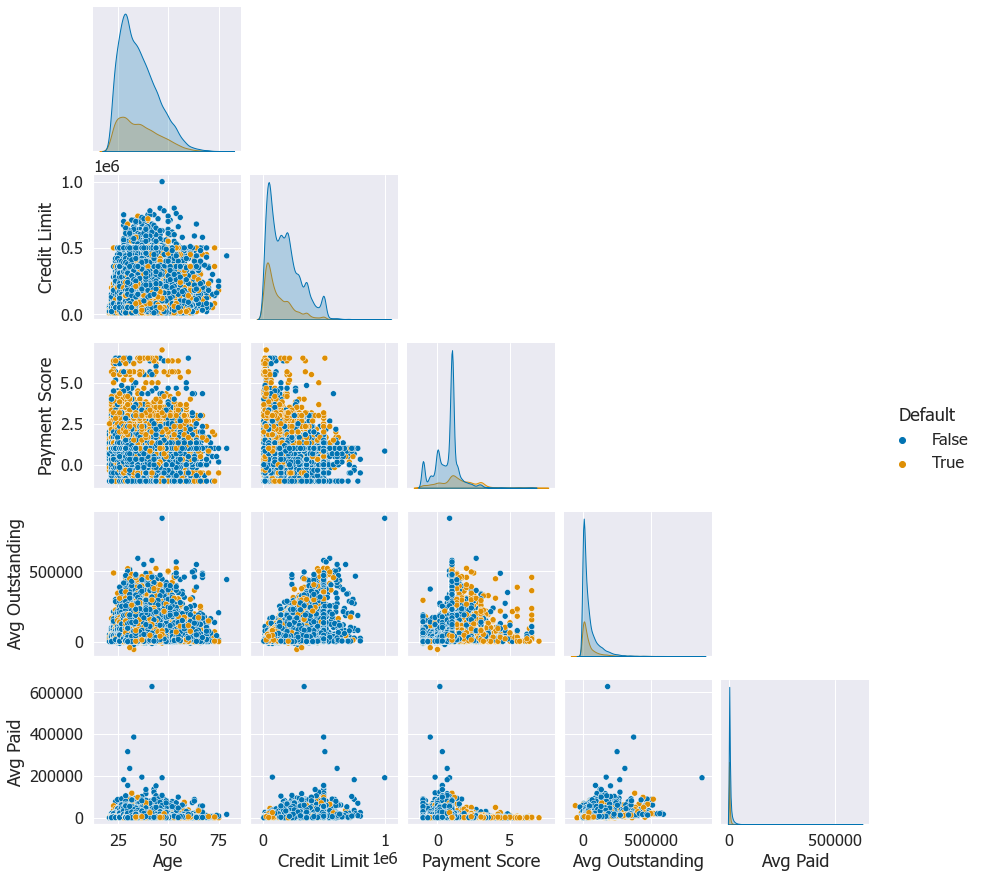

In [15]:
sns.pairplot(data=df, hue="Default", corner="True")
plt.show()

- Looks like there is relation between amount paid and outstanding.
- Payment score increase looks proportional to default, as expected
- May be interesting to compare gender in some analysis

#### Heatmap to better understand any correlations/possible areas of interest

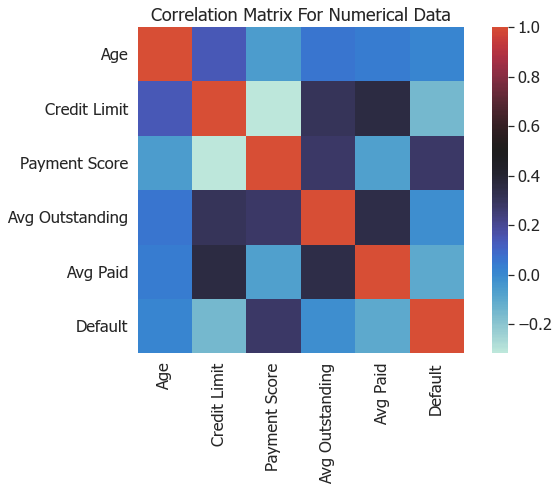

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), square=True, center=0.5, yticklabels=True).set_title('Correlation Matrix For Numerical Data')
plt.show()

- Strong correlation between Average Paid and Average Outstanding
- Similarily with Average Outstanding and Credit Limit

#### Average Paid vs Average Outstanding

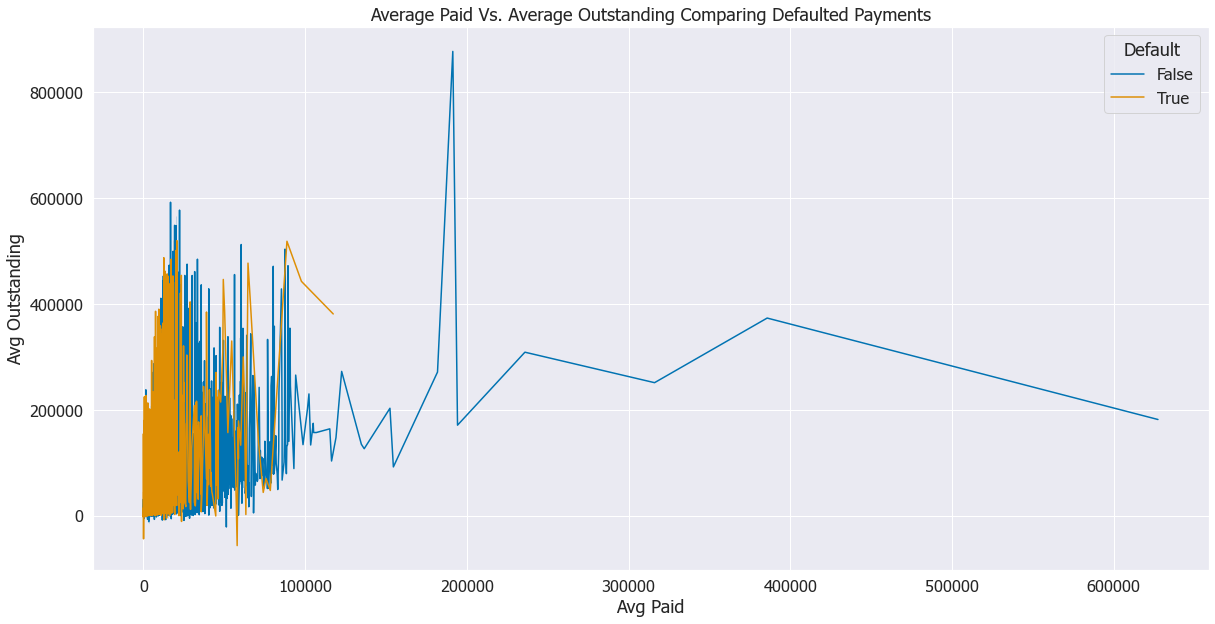

In [18]:
plt.subplots(figsize=(20, 10))
ax = sns.lineplot(x="Avg Paid", y="Avg Outstanding", hue="Default", data=df)
ax.set_title('Average Paid Vs. Average Outstanding Comparing Defaulted Payments')
plt.show()

#### Joint plot to view Credit Limit vs Payment Score and Average Outstanding vs Payment Score

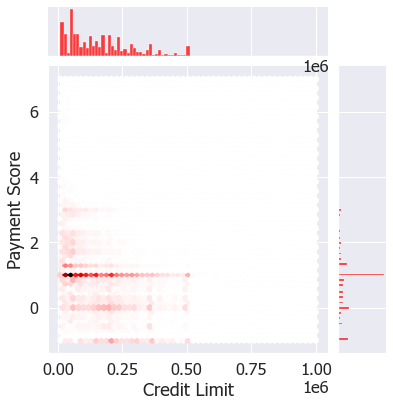

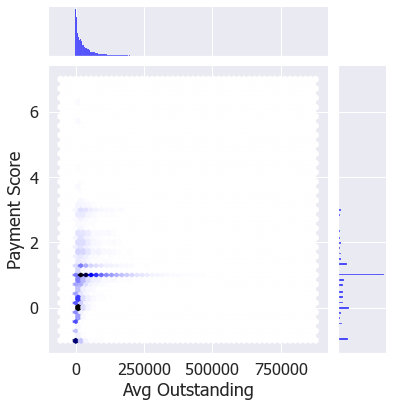

In [20]:
sns.jointplot(data=df, x='Credit Limit', y='Payment Score',kind = 'hex',color='red')
sns.jointplot(data=df, x='Avg Outstanding', y='Payment Score',kind = 'hex',color='blue')
sns.despine()

- Payment score seems to peak in the same area for credit limit and average outstanding, could be that this is also the average credit limit.

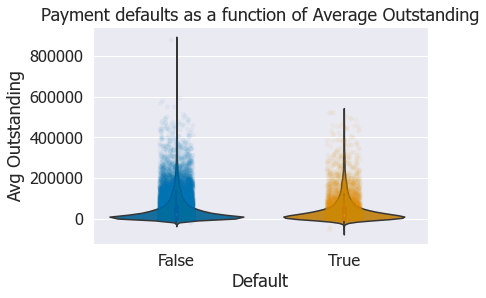

In [21]:
sns.violinplot(data=df, y='Avg Outstanding', x='Default').set(title='Payment defaults as a function of Average Outstanding')

bx = sns.stripplot(x='Default',
                   y = 'Avg Outstanding',
                   data = df,
                  alpha=0.05)

plt.show()

- The amount of outstanding balance doesn't necessarily seem to influence the amount of defaults
- They look quite similar and don't really show any strong differences

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

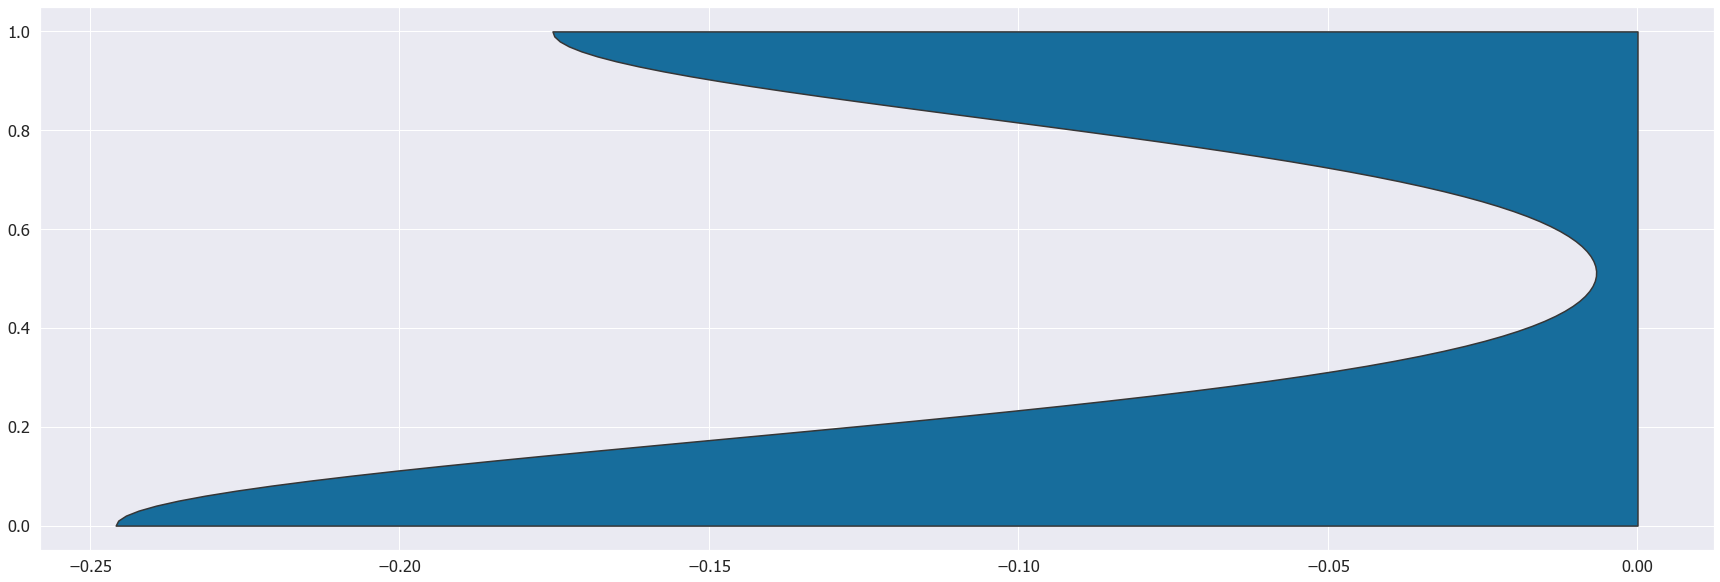

In [23]:
df = FunctionScript.LoadnClean('G:\\COSC301\\project\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv')
plt.subplots(figsize = (30, 10))
sns.violinplot(data = df, x= 'Credit Limit', y= 'Default', hue = 'Sex', split = True, inner = "quartile", scale = 'count', cut = 0)
plt.ticklabel_format(axis="x", style="plain")
plt.ylabel('Default Status', fontsize = 18)
plt.xlabel('Credit Limit (NT$)', fontsize = 18)
plt.title("Default Status by Credit Limit and Gender", fontsize = 30)
sns.despine()